## Задача 28. Метод нелинейных квадратов. ##
[More J. J., Garbow B. S., Hillstrom K. E. Testing unconstrained optimization software // ACM TOMS. 1981. 7 (1). 17--41]

Нелинейным методом наименьших квадратов
построить модели вида
$$
y = \beta_1 e^{-\beta_2 x}
\qquad
 и 
\qquad
y = \beta_1 e^{\frac{\beta_2}{x+\beta_3}}
$$
для данных, приведенных в таблице
```
  x    |     y    
----------------                
 50    |   34780    
 55    |   28610    
 60    |   23650    
 65    |   19630    
 70    |   16370    
 75    |   13720    
 80    |   11540    
 85    |    9744    
 90    |    8261    
 95    |    7030    
100    |    6005    
105    |    5147    
110    |    4427    
115    |    3820    
120    |    3307    
125    |    2872    
```
Для первой функции также найдите аппроксимацию, сведя задачу к линейному методу наименьших квадратов. Найти общую ошибку в каждом из случаев и сравнить результаты.



## Решение


###Модель №1
Разберемся с первой моделью. Заметим, что с помощью логарифмирования мы можем свести ее к условно-линейной:


$$\ln(y) = \ln({\beta}_{1}) - {\beta}_{2} x$$


Найдем сумму квадратов ошибки:


$$ \sum\limits_{i=1}^n e_i^2 = \sum\limits_{i=1}^n (y_i - f_i(x))^2 = \sum\limits_{i=1}^n (y_i - \ln(\beta_1) + \beta_2 x)^2$$


Затем производные по $\beta_1$ и $\beta_2$, которые должны быть минимальными, т.е. нулевыми:


$$ \frac{\mathrm d}{\mathrm d \beta_1} \left( e_1^2 \right) =  -2 \frac{\sum_{i=1}^n(y_i - ln(\beta_1) + \beta_2 x)}{\beta_1} = 0  $$ $$ \frac{\mathrm d}{\mathrm d \beta_2} \left( e_1^2 \right) =  -2 x \sum_{i=1}^n(y_i - \ln(\beta_1) + \beta_2 x) = 0  $$


Отсюда можем получить систему линейных уравнений: 


$$\begin{equation*}
 \begin{cases}
    n\cdot \ln\beta_1-\beta_2\sum\limits_{i=1}^nx_i=\sum\limits_{i=1}^ny_i\\
    \ln\beta_1\sum\limits_{i=1}^nx_i-\beta_2\sum\limits_{i=1}^nx_i^2=\sum\limits_{i=1}^n (x_iy_i)
 \end{cases}
\end{equation*}$$


Составим матричное уравнение:


$$\begin{pmatrix}
  n& -\sum\limits_{i=1}^nx_i\\
  \sum\limits_{i=1}^nx_i& \sum\limits_{i=1}^nx_i^2
\end{pmatrix} \cdot\begin{pmatrix}
  \ln\beta_1\\
  \beta_2
\end{pmatrix} = \begin{pmatrix}
  \sum\limits_{i=1}^ny_i\\
  \sum\limits_{i=1}^nx_iy_i
\end{pmatrix}$$


Пусть $$A=\begin{pmatrix}
  n& -\sum\limits_{i=1}^nx_i\\
  \sum\limits_{i=1}^nx_i& \sum\limits_{i=1}^nx_iy_i
\end{pmatrix},$$


тогда домножая уравнение на $A^{-1}$ и выполняя умножение, найдем коэффициенты $\beta_1$ и $\beta_2$. Оставим рассчеты компьютеру:

In [39]:
import numpy

# Вводим исходные данные
x = numpy.arange(50, 125 + 1, 5)
y = numpy.array([34780, 28610, 23650, 19630, 16370, 13720, 11540, 9744, 8261, 7030, 6005, 5147, 4427, 3820, 3307, 2872])

# Т.к. мы логарифмировали исходную модель, значения также нужно логарифмировать
y_log = numpy.array(list(map(lambda i: numpy.log(i), y))) 

# Создаем матрицу A
n = len(x)
A = numpy.empty((2,2))
A[[0],[0]] = n
A[[0],[1]] = -sum(x)
A[[1],[0]] = sum(x)
A[[1],[1]] = -sum(map(lambda i: i ** 2, x))

# Вычисляем обратную матрицу
A = numpy.linalg.inv(A)

# Создаем матрицу правой части уравнения
C = numpy.empty((2, 1))
C[0] = sum(y_log)
C[1] = sum(x[i] * y_log[i] for i in range(0, n))

# Выполняем умножение
[[b1], [b2]] = numpy.dot(A, C)

# Не забываем, что матричное уравнение было относительно β₁. Экспоненцируем, чтобы получить первородный коэффициент
b1 = numpy.exp(b1)

# Выводим результат
print(f"Beta_1 = {b1}\nBeta_2 = {b2}")

Beta_1 = 170284.11836823964
Beta_2 = 0.033176953435955114


Имея коэффициенты можем построить график:

[]

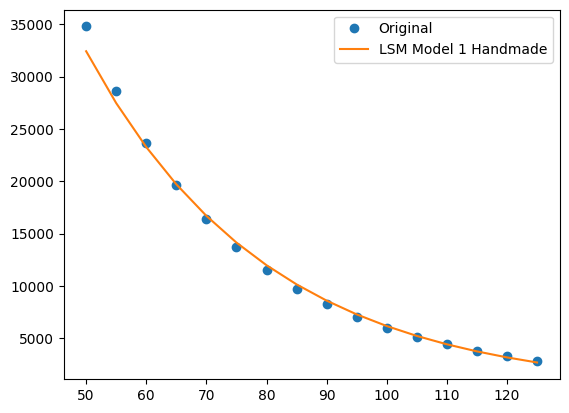

In [40]:
import matplotlib.pyplot as plt

# Функция - модель y₁
def y1(x, b1, b2):
  return b1 * numpy.exp(-b2 * x)

# Отображаем исходные данные
plt.plot(x, y, 'o', label='Original')

# Отображаем полученную модель
y1_handmade = numpy.array(list(map(lambda i: y1(i, b1, b2), x)))
plt.plot(x, y1_handmade, label="LSM Model 1 Handmade")
plt.legend()
plt.plot()

На основе полученных коэффициентов можно получить более точные с помощью функции curve_fit библиотеки scipy:

Refined_Beta_1 = 202040.45100951724
Refined_Beta_2 = 0.03554511803617114


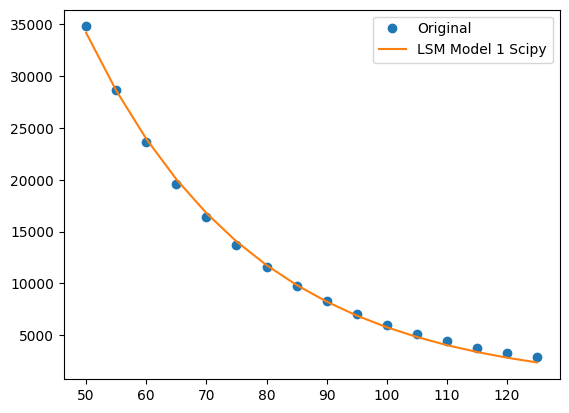

In [41]:
from scipy.optimize import curve_fit

# Создаем список уточнённых коэффициентов
[r_b1, r_b2] = [b1, b2]

# Вычисляем их с помощью средств библиотеки scipy
[r_b1, r_b2] = curve_fit(y1, x, y, [r_b1, r_b2])[0]

# Выводим полученные значения
print(f"Refined_Beta_1 = {r_b1}\nRefined_Beta_2 = {r_b2}")

# Отрисовываем график
plt.plot(x, y, 'o', label='Original')
y1_scipy = numpy.array(list(map(lambda i: y1(i, r_b1, r_b2), x)))
plt.plot(x, y1_scipy, label='LSM Model 1 Scipy')
plt.legend();
plt.show()

Как мы можем заметить, мы получили более точные значения коэффициентов. От части это можно объяснить тем, что в начале ручных преобразований мы воспользовались логарифмированием: это накладывает условие положительности аргумента, несколько изменяет структуру рассматриваемой модели; а в процессе последующих компьютерных вычислений, хоть и незначительно, но теряется точность.

Далее вычислим общую ошибку по первой модели:

$$\overline{err} = \frac{\sum\limits_{i=1}^n{err_i^2}}{n} = \frac{\sum\limits_{i=1}^n{(y_i-\ln\beta_1+\beta_2x)^2}}{n}$$

In [42]:
# Вычисляем
err_1_handmade = sum(map(lambda i: i ** 2, y - y1_handmade)) / 16
err_1_scipy = sum(map(lambda i: i ** 2, y - y1_scipy)) / 16

# Отображаем
print(f'Model 1 Error Handmade Edition:\t {err_1_handmade}\nModel 1 Error Scipy Edition:\t {err_1_scipy}')

Model 1 Error Handmade Edition:	 498737.0402216325
Model 1 Error Scipy Edition:	 120954.06416048578


###Модель №2
Приступим ко второй модели $y_2=\beta_1 e^\frac{\beta_2}{\beta_3+x}$

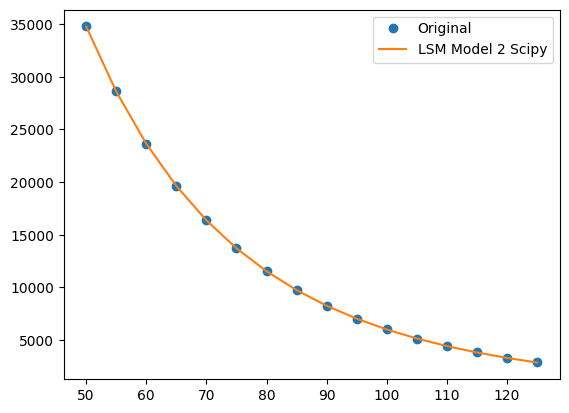

In [43]:
# Создаем список коэффициентов
betas = [0.001, 1000, 100]

# Функция, реализующая вторую модель
def y2(x, b1, b2, b3):
  return b1 * numpy.exp(b2 / (x + b3))

# Вычисляем коэффициенты
betas = curve_fit(y2, x, y, betas)[0]

# Отрисовываем график
plt.plot(x, y, 'o', label='Original')
y2_scipy = numpy.array(list(map(lambda i: y2(i, *betas), x)))
plt.plot(x, y2_scipy, label='LSM Model 2 Scipy')
plt.legend()
plt.show()

Вычислим ошибку по прежней формуле:

In [44]:
# Вычисляем
err_2_scipy = sum(map(lambda i: i ** 2, y - y2_scipy)) / 16

# Отображаем
print(f"Model 2 Error Scipy Edition: {err_2_scipy}")


Model 2 Error Scipy Edition: 5.496615948185115


##Вывод
Судя по величинам ошибок, вторая модель в исполнении $\text{scipy.optimize.curve_fit()}$ гораздо точнее, в $\approx 22000$ раз, чем первая модель. Несмотря на колосальную численную разницу, по графику расхождения не так заметны:
 

[]

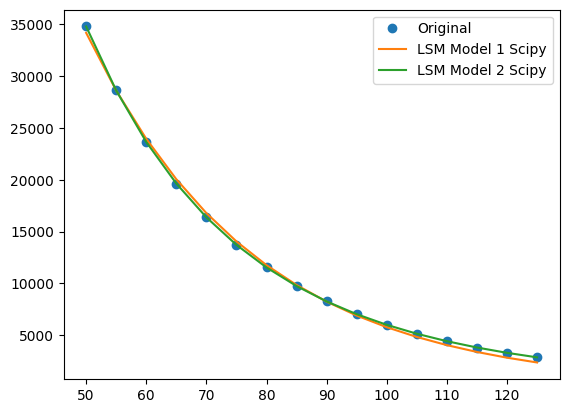

In [45]:
# Отображаем апроксимации по первой и по второй моделям
plt.plot(x, y, 'o', label='Original')
plt.plot(x, y1_scipy, label='LSM Model 1 Scipy')
plt.plot(x, y2_scipy, label='LSM Model 2 Scipy')
plt.legend()
plt.plot()

Таким образом, для примерного расчета подойдут и простые методы апроксимации, но если важна максимальная точность, то лучше выбрать более сложные функции с бо́льшиим количеством параметром - это позволит получить лучший результат.